In [2]:
#imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [3]:
#visualisation
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#ML
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
hot_encoder = OneHotEncoder(categorical_features=[0])
label_encoder= LabelEncoder()

In [6]:
train_data_address= 'Datasets/Titanic/train.csv'
test_data_address = 'Datasets/Titanic/test.csv'

In [7]:
titanic_data_train= pd.read_csv(train_data_address)
titanic_data_train.info()
titanic_data_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic_data_test = pd.read_csv(test_data_address)
titanic_data_test.info()
titanic_data_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
titanic_data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
features=['Age','Sex','Fare']

In [11]:
X=titanic_data_train[features]
X.head()

,Age,Sex,Fare
0,22.0,male,7.2500
1,38.0,female,71.2833
2,26.0,female,7.9250
3,35.0,female,53.1000
4,35.0,male,8.0500


In [12]:
titanic_data_train.describe(include=['O'])  # 'O' to describe Objects (strings)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Simonius-Blumer, Col. Oberst Alfons",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [13]:
titanic_data_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(['Survived'], ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


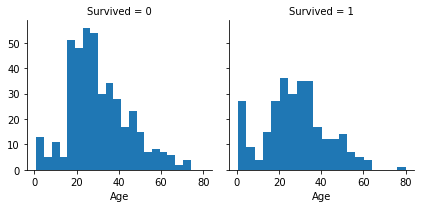

In [14]:
g = sns.FacetGrid(titanic_data_train,col='Survived')

g.map(plt.hist, 'Age', bins=20)

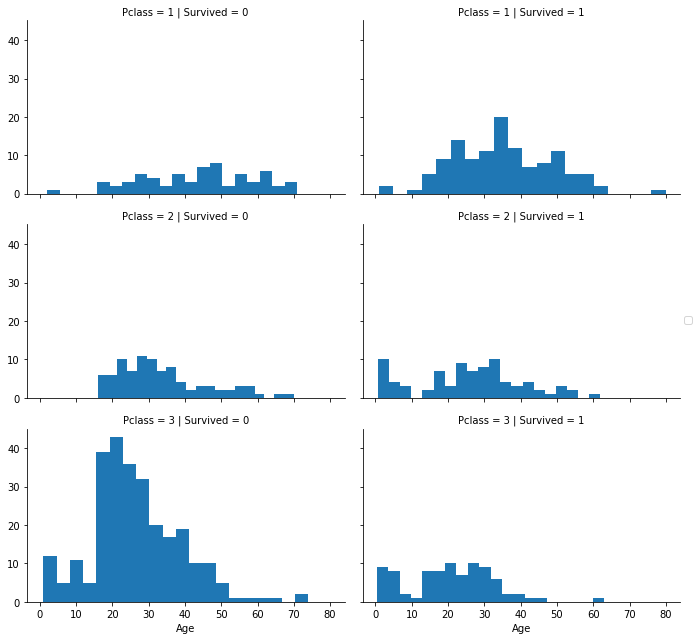

In [15]:
g1 = sns.FacetGrid(titanic_data_train, col='Survived', row='Pclass', aspect=1.6)
g1.map(plt.hist, 'Age', alpha=1, bins=20)  #Alpha - Determines the darkness of the graph. Bins - Segments
g1.add_legend()

C:\Users\PD-PC\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\PD-PC\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


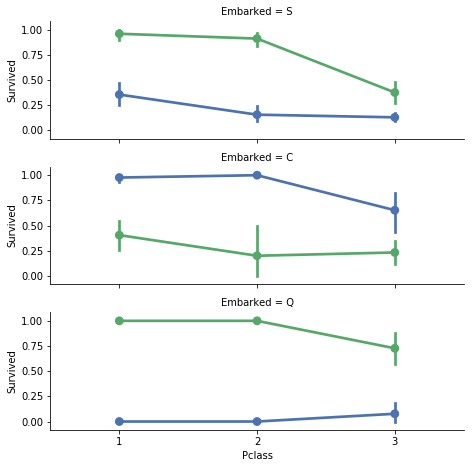

In [16]:
g2 = sns.FacetGrid(titanic_data_train, row='Embarked', size=2.2, aspect=3)  #Aspect - Width of the plot
g2.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')

In [17]:
combine = [titanic_data_train, titanic_data_test]

In [18]:
#Extracting Titles

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')
dataset['Title'].head()
pd.crosstab(titanic_data_train['Title'],titanic_data_train['Sex'])


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [19]:

#Replacing various uncommon titles with 'Rare'

for data in combine:
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Rare')
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    
titanic_data_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [20]:
#Encoding title

titanic_data_train['Title'] =label_encoder.fit_transform(titanic_data_train['Title'])
titanic_data_test['Title'] =label_encoder.fit_transform(titanic_data_test['Title'])



In [21]:
#Dropping Name and Id
titanic_data_train = titanic_data_train.drop(['Name','Ticket','Cabin'], axis=1)
titanic_data_test = titanic_data_test.drop(['Name','Ticket','Cabin'], axis=1)

In [22]:
#Encoding Sex
titanic_data_train['Sex'] = label_encoder.fit_transform(titanic_data_train['Sex'])
titanic_data_test['Sex'] = label_encoder.fit_transform(titanic_data_test['Sex'])

In [23]:
combine = pd.concat([titanic_data_train , titanic_data_test], sort = True)
combine.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title
0,22.0,S,7.2500,0,1,3,1,1,0.0,2
1,38.0,C,71.2833,0,2,1,0,1,1.0,3
2,26.0,S,7.9250,0,3,3,0,0,1.0,1
3,35.0,S,53.1000,0,4,1,0,1,1.0,3
4,35.0,S,8.0500,0,5,3,1,0,0.0,2


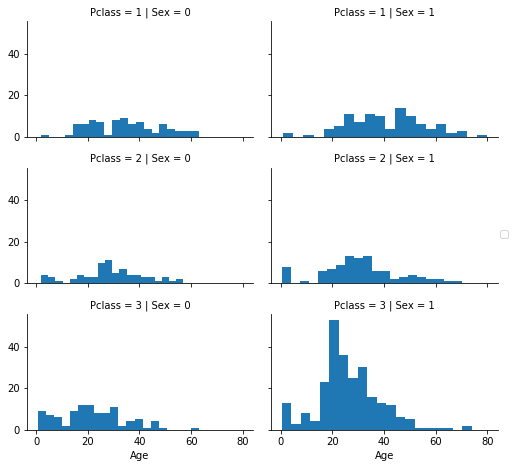

In [24]:
grid = sns.FacetGrid(titanic_data_train, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=1, bins=20)
grid.add_legend()

In [25]:
#Calculating Medians of Ages of each sex in each PClass
medians = np.zeros((2,3))
medians
for i in range(3):
    for j in range(2):
        temp = combine[combine['Sex']==j]
        temp = temp[temp['Pclass']==i+1]
        temp = temp[temp['Age'].notna()]
        temp = temp['Age']
        medians[j,i]=round(temp.median())
     
        
print(medians)
print(titanic_data_train.head())
print(titanic_data_test.head())

[[36. 28. 22.]
 [42. 30. 25.]]
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  \
0            1         0       3    1  22.0      1      0   7.2500        S   
1            2         1       1    0  38.0      1      0  71.2833        C   
2            3         1       3    0  26.0      0      0   7.9250        S   
3            4         1       1    0  35.0      1      0  53.1000        S   
4            5         0       3    1  35.0      0      0   8.0500        S   

   Title  
0      2  
1      3  
2      1  
3      3  
4      2  
   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  Title
0          892       3    1  34.5      0      0   7.8292        Q      2
1          893       3    0  47.0      1      0   7.0000        S      3
2          894       2    1  62.0      0      0   9.6875        Q      2
3          895       3    1  27.0      0      0   8.6625        S      2
4          896       3    0  22.0      1      1  12.2875       

In [26]:
#Replacing Null values with respective median
for i in range(2) :
    for j in range(3):
        titanic_data_train.loc[(titanic_data_train.Age.isnull()) & (titanic_data_train.Sex==i) & (titanic_data_train.Pclass==j+1),'Age'] = medians[i,j]
        titanic_data_test.loc[(titanic_data_test.Age.isnull()) & (titanic_data_test.Sex==i) & (titanic_data_test.Pclass==j+1),'Age'] = medians[i,j]


In [27]:
titanic_data_train.Embarked = label_encoder.fit_transform(titanic_data_train.Embarked.fillna('0'))
titanic_data_test.Embarked = label_encoder.fit_transform(titanic_data_test.Embarked.fillna('0'))

In [28]:
print(titanic_data_train.head())
print(titanic_data_test.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  \
0            1         0       3    1  22.0      1      0   7.2500         3   
1            2         1       1    0  38.0      1      0  71.2833         1   
2            3         1       3    0  26.0      0      0   7.9250         3   
3            4         1       1    0  35.0      1      0  53.1000         3   
4            5         0       3    1  35.0      0      0   8.0500         3   

   Title  
0      2  
1      3  
2      1  
3      3  
4      2  
   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Title
0          892       3    1  34.5      0      0   7.8292         1      2
1          893       3    0  47.0      1      0   7.0000         2      3
2          894       2    1  62.0      0      0   9.6875         1      2
3          895       3    1  27.0      0      0   8.6625         2      2
4          896       3    0  22.0      1      1  12.2875         2      3


In [29]:
'''X_train = titanic_data_train.drop("Survived", axis=1)
Y_train = titanic_data_train["Survived"]
X_test  = titanic_data_test.copy()
X_train.shape, Y_train.shape, X_test.shape
'''

'X_train = titanic_data_train.drop("Survived", axis=1)\nY_train = titanic_data_train["Survived"]\nX_test  = titanic_data_test.copy()\nX_train.shape, Y_train.shape, X_test.shape\n'

In [30]:
'''X_train = X_train.drop(['Fare','SibSp','Parch','PassengerId','Title','Embarked'],axis=1)
X_train.head()'''

"X_train = X_train.drop(['Fare','SibSp','Parch','PassengerId','Title','Embarked'],axis=1)\nX_train.head()"

In [31]:
'''X_test = X_test.drop(['Fare','SibSp','Parch','PassengerId','Title','Embarked'],axis=1)'''

"X_test = X_test.drop(['Fare','SibSp','Parch','PassengerId','Title','Embarked'],axis=1)"

In [32]:
y = titanic_data_train.Survived
X= titanic_data_train.drop(['Fare','SibSp','PassengerId','Survived','Embarked','Parch'], axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(X,y)

In [33]:
X_train.head()

,Pclass,Sex,Age,Title
288,2,1,42.0,2
651,2,0,18.0,1
811,3,1,39.0,2
557,1,1,42.0,2
658,2,1,23.0,2


In [90]:
#KNN 
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
#acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn = round(knn.score(X_test, Y_test) * 100, 2)

print(acc_knn)
print(f1_score(Y_test,Y_pred))

78.03
0.6918238993710691


In [92]:
#Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
#acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
print(acc_decision_tree)
print(f1_score(Y_test,Y_pred))

80.27
0.7105263157894737


In [77]:
#SVM
svm = SVC(kernel = 'linear')
svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)
#acc_svm = round(svm.score(X_train, Y_train) * 100, 2)
acc_svm = round(svm.score(X_test, Y_test) * 100, 2)

print(acc_svm)
print(f1_score(Y_test,Y_pred))

80.72
0.7114093959731543


In [37]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
#acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)

print("Accuracy on test set  = ",acc_random_forest)
print(f1_score(Y_test,Y_pred))

Accuracy on test set  =  80.27
0.7215189873417722


In [72]:
#Logistic Regression
logreg = LogisticRegression(penalty='l2',solver='newton-cg',max_iter = 100)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
#acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log = round(logreg.score(X_test, Y_test) * 100, 2)
print(f1_score(Y_test,Y_pred))
acc_log

0.7549668874172185


83.41

In [39]:
titanic_data_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,1,34.5,0,0,7.8292,1,2
1,893,3,0,47.0,1,0,7.0000,2,3
2,894,2,1,62.0,0,0,9.6875,1,2
3,895,3,1,27.0,0,0,8.6625,2,2
4,896,3,0,22.0,1,1,12.2875,2,3


In [40]:
submission = pd.DataFrame({
        "PassengerId": titanic_data_test["PassengerId"],
        "Survived": Y_pred
    })

ValueError: array length 223 does not match index length 418

In [ ]:
#submission = submission.to_csv( 'Submission.csv', index=None , header = True)